In [21]:
from IPython.display import SVG
import pandas as pd
from src.post_processing import PathWrangler
from src.config import filepaths
from src.utils import load_json
from rdkit import Chem
from rdkit.Chem import Draw

In [9]:

rules = pd.read_csv(filepaths['rules'] / "minimal1224_all_uniprot.tsv", sep='\t')
rules.set_index("Name", inplace=True)

pw = PathWrangler(
    path_filepath= filepaths['processed_expansions'] / "archive" / 'found_paths.json',
    pr_filepath= filepaths['processed_expansions'] / "archive" / 'predicted_reactions.json',
    kr_filepath= filepaths['processed_expansions'] / "archive" / 'known_reactions.json',
)

def show_problem(pid: str, step: int, pw: PathWrangler = pw, rules: pd.DataFrame = rules):
    p = pw.get_path_with_id(pid)
    pr = p.reactions[step]
    a = pr.top_analogues(k=1)[0]
    pr_ops = set([o.split('_')[0] for o in pr.operators])
    a_ops = set([o.split('_')[0] for o in a.operators])
    inter_rules = pr_ops & a_ops
    print("Operators that map both predicted reaction and known analogue: ")
    for rule in inter_rules:
        print(f"{rule}: {rules.loc[rule, 'SMARTS']}")
    
    print("\nOperators that map predicted reaction: ",pr.operators)
    print("Operators that map analogue: ",  a.operators)
        
    print("\nPredicted reaction")
    display(SVG(pr.image))

    print("Analogue")
    display(SVG(a.image))




Operators that map both predicted reaction and known analogue: 
rule0028: ([#6:1].[#6:2]-[#6:3])>>([#6:2].[#6:1]-[#6:3])

Operators that map predicted reaction:  ['rule0028_50']
Operators that map analogue:  ['rule0028']

Predicted reaction


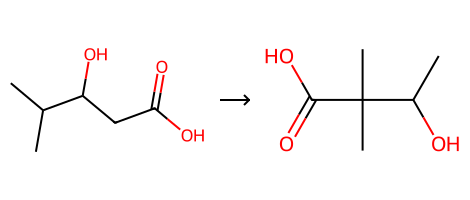

Analogue


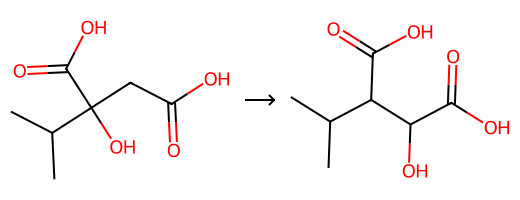



Operators that map both predicted reaction and known analogue: 
rule0126: [#6:1].[#6:2]-[#6:3]>>[#6:2].[#6:1]-[#6:3]

Operators that map predicted reaction:  ['rule0126_1']
Operators that map analogue:  ['rule0126', 'rule0126_2', 'rule0324_1']

Predicted reaction


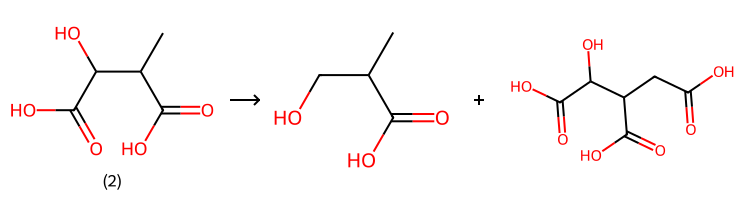

Analogue


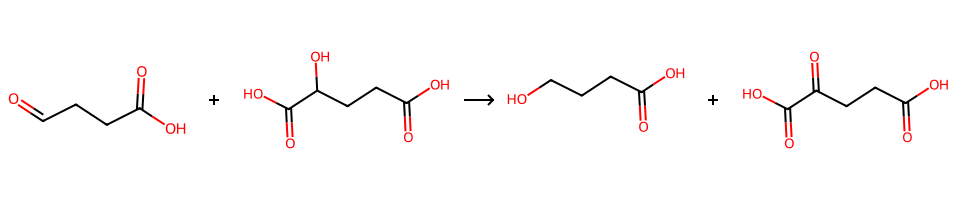



Operators that map both predicted reaction and known analogue: 
rule0126: [#6:1].[#6:2]-[#6:3]>>[#6:2].[#6:1]-[#6:3]

Operators that map predicted reaction:  ['rule0126_1']
Operators that map analogue:  ['rule0126', 'rule0126_1', 'rule0324_2']

Predicted reaction


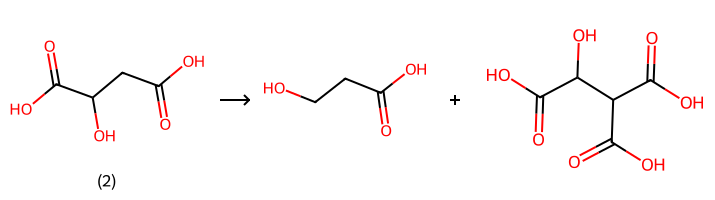

Analogue


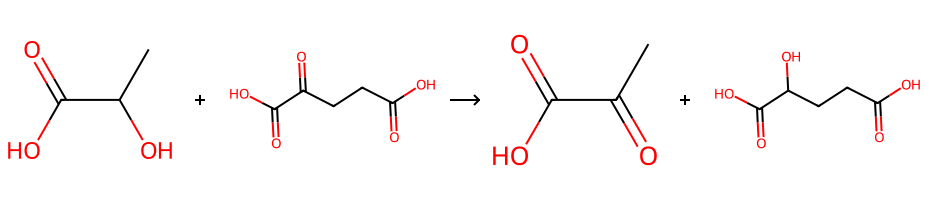



Operators that map both predicted reaction and known analogue: 
rule0126: [#6:1].[#6:2]-[#6:3]>>[#6:2].[#6:1]-[#6:3]

Operators that map predicted reaction:  ['rule0126_1']
Operators that map analogue:  ['rule0126', 'rule0126_1', 'rule0324_2']

Predicted reaction


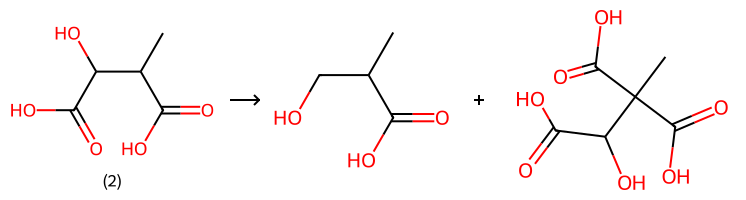

Analogue


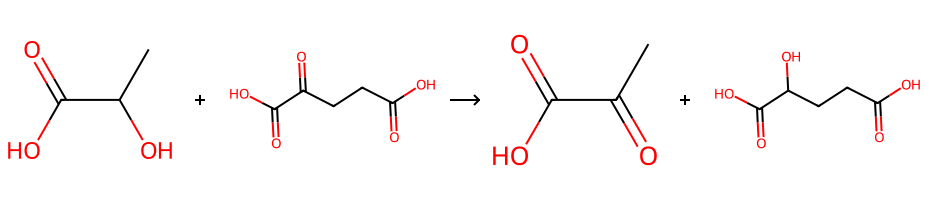



Operators that map both predicted reaction and known analogue: 
rule0028: ([#6:1].[#6:2]-[#6:3])>>([#6:2].[#6:1]-[#6:3])

Operators that map predicted reaction:  ['rule0028_50']
Operators that map analogue:  ['rule0028', 'rule0028_47']

Predicted reaction


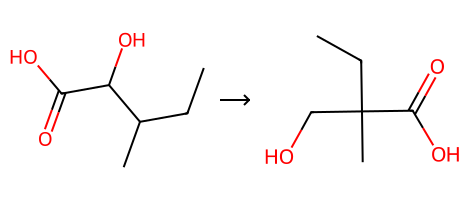

Analogue


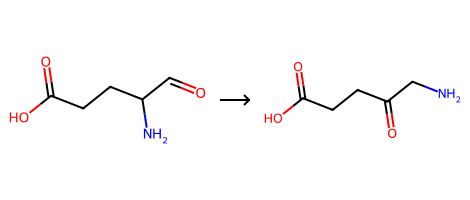



Operators that map both predicted reaction and known analogue: 
rule0028: ([#6:1].[#6:2]-[#6:3])>>([#6:2].[#6:1]-[#6:3])

Operators that map predicted reaction:  ['rule0028_50']
Operators that map analogue:  ['rule0028']

Predicted reaction


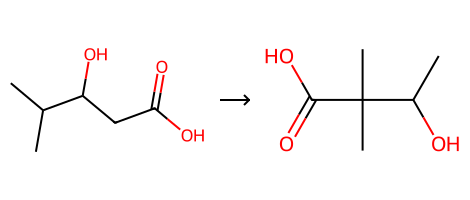

Analogue


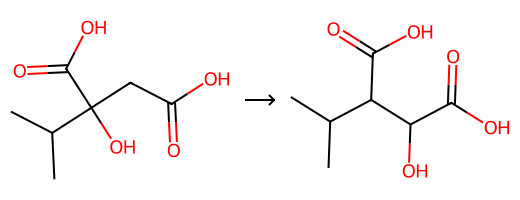



Operators that map both predicted reaction and known analogue: 
rule0028: ([#6:1].[#6:2]-[#6:3])>>([#6:2].[#6:1]-[#6:3])

Operators that map predicted reaction:  ['rule0028_50']
Operators that map analogue:  ['rule0028', 'rule0028_47']

Predicted reaction


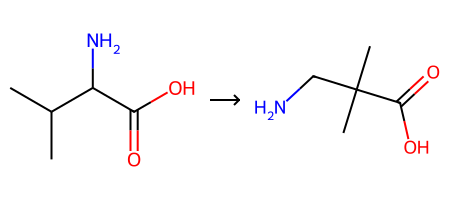

Analogue


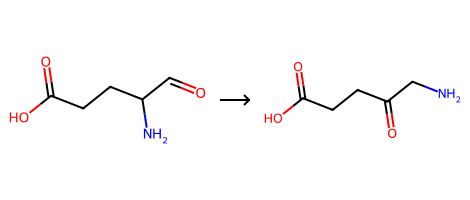

In [10]:
# Problematic
problems = [
    ('P019f0330406c83b4d12823f480e8f68c006ef345', -1),
    ('P4d4cf75ccd62b55a0686f46d6e4b52d860725fe5', 1),
    ('P5b5ed50f979c6bad62a65d71da88a84d4a259348', 0),
    ('P77b28de7590b39ebcf60a7a4f4bdde47767f2ae7', 1),
    ('Pef934dc8b4ba9f348f2d530a575a4467c056459f', 1), # Might be real, but not a good analogue
    ('P2eb5a964bdc1db846cd9496f22d0eda68941ab3d', -1),
    ('P105ebcd3f73ba8e8128c306b562a8f7b767f82ac', 0)
]

for pid, step in problems:
    show_problem(pid, step)
    print('\n')

In [26]:
known_reactions = load_json(filepaths['sprhea'] / "sprhea_240310_v4_mapped.json")
known_reactions = {k:v for k,v in known_reactions.items() if v['imt_rules']}
imt_of_i = 'rule0028_50'
rxns_of_i = {k: rxn for k, rxn in known_reactions.items() if imt_of_i in rxn['imt_rules']}

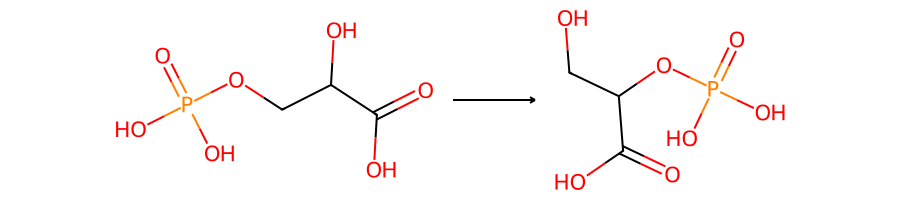

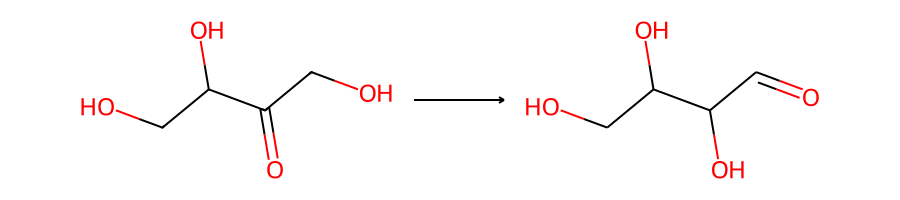

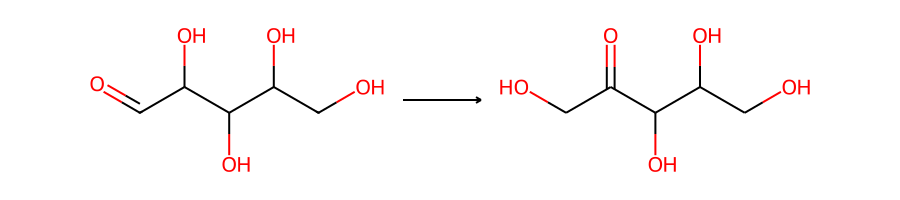

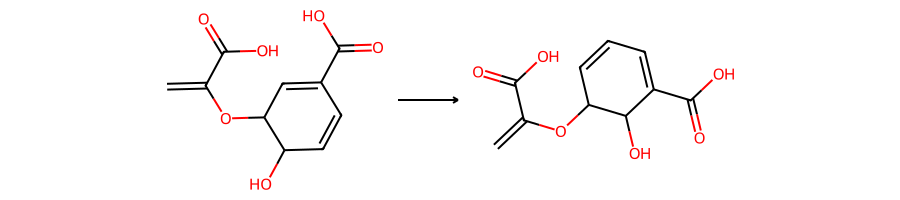

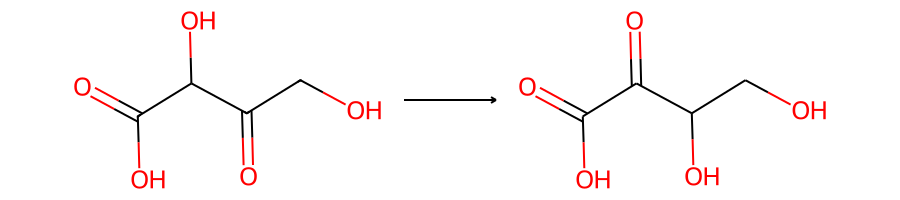

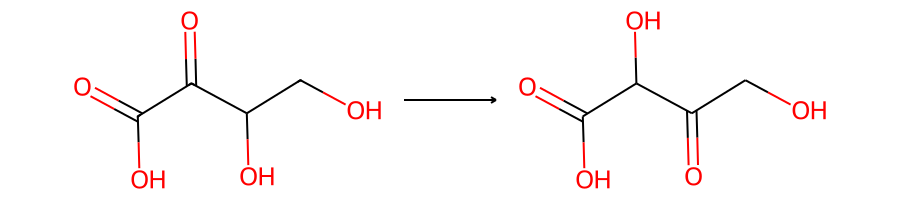

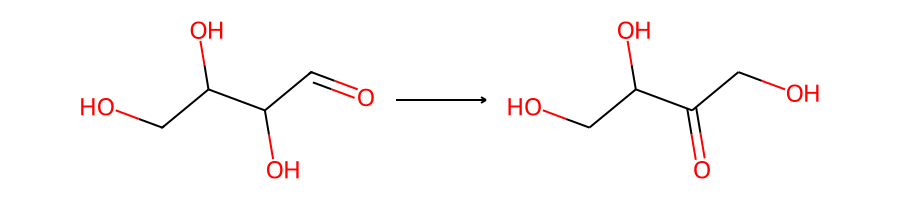

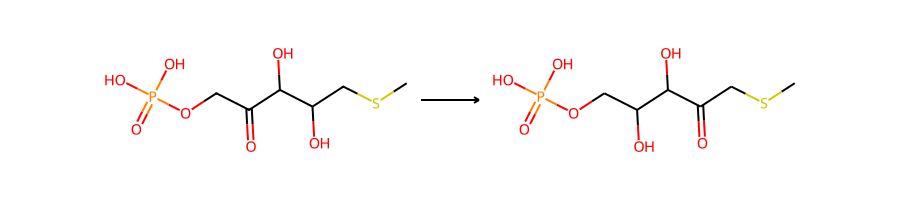

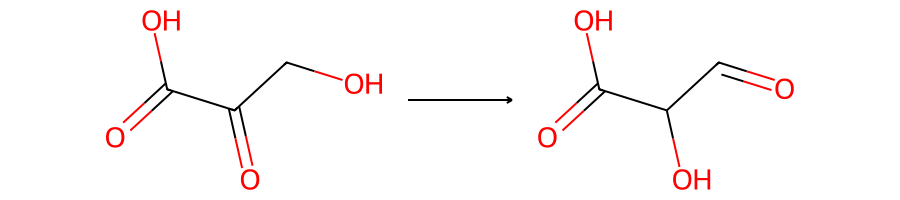

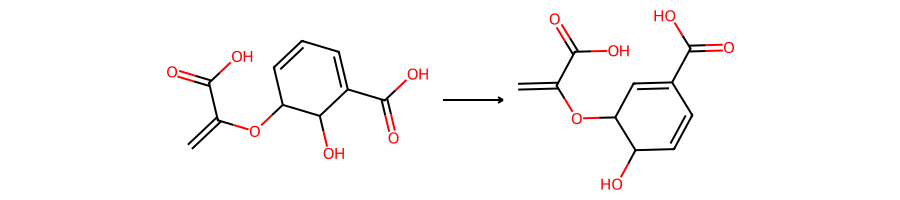

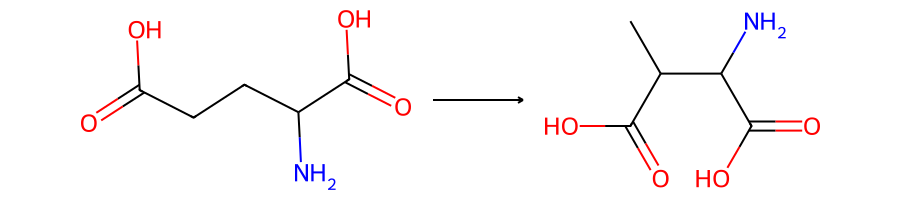

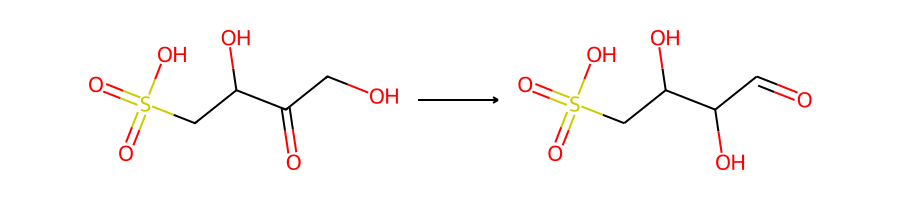

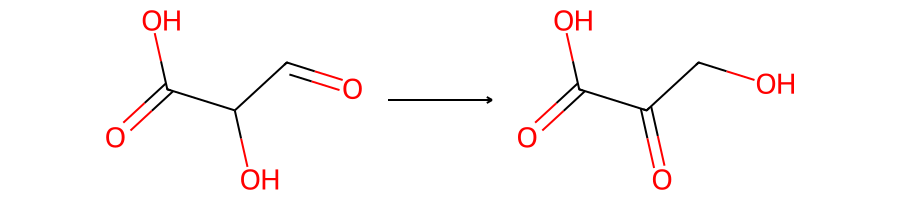

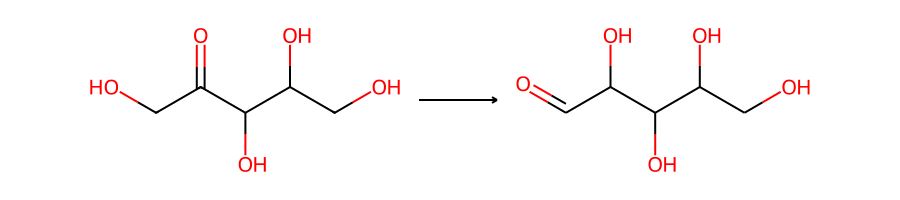

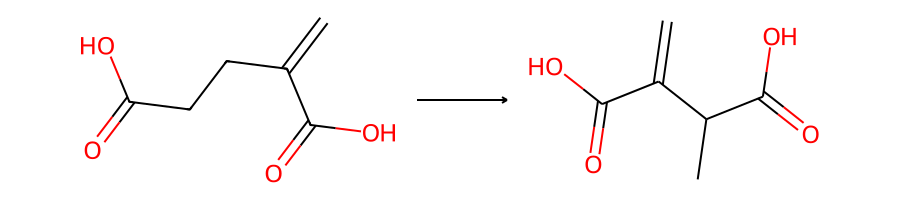

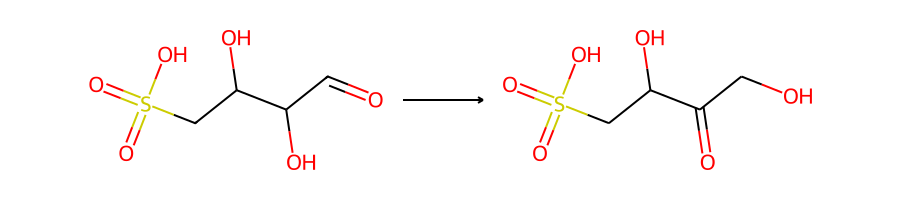

In [27]:
for elt in rxns_of_i.values():
    rxn = Chem.rdChemReactions.ReactionFromSmarts(elt['smarts'], useSmiles=True)
    pic = Draw.ReactionToImage(rxn, useSVG=True, subImgSize=(300, 200))
    display(SVG(pic))

In [7]:
path = pw.get_path_with_id('P7362925724eaa940bf60614682e6db4d9579cbf9')
for pr in path.reactions:
    print(pr.image)
    print(pr.top_analogues(k=2)[0].image)

../artifacts/imgs/rxns/R27fbfe38615dcc7ddaf2ce01b5ad9ee2f9bdd9270123b457204c79969510f20d.svg
../artifacts/imgs/rxns/14187.svg
../artifacts/imgs/rxns/R050ea8de0b98efbab1c9fc15536f40f11fd57f28e3de0a5a9a69ca6c13e8973b.svg
../artifacts/imgs/rxns/3726.svg
